# Rory Sheridan - Continuous Assessment 2


## Additional Libraries and Tools


### [Github Repo](https://github.com/Ri-Dearg/data-analytics-dbs/)

This file and its commit history [can be found by clicking here](https://github.com/Ri-Dearg/data-analytics-dbs/blob/main/programming/ca2/ca2_prog.ipynb).

### [Colorama](https://pypi.org/project/colorama/)

Used to give feedback in varied colours in the terminal. The Fore and Style used throughout the notebook are for this.

### [Pandas](https://pandas.pydata.org)

For data analysis and manipulation.

### [Pylint](https://www.pylint.org)

Used as a linter for code quality control.

### [Ruff](https://docs.astral.sh/ruff/)

Used as both a linter and a formatter. Configuration has been adjusted to conform to PEP8 standard.

### [Seaborn](https://seaborn.pydata.org)

For data visualisation.


In [340]:
# Install colorama on google colab.
%pip install colorama

# For creating plots.
import seaborn as sns

# For coloring text.
from colorama import Fore, Style

# For Dataframes.
from pandas import DataFrame, concat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Utilities


Two utilities to help colour the cells in the DataFrame output.


In [341]:
def color_last_cell(column: str, color: str) -> object:
    """Style the last cell of a column.

    Args:
        column (str): the column to style.
        color (str): The color to use.

    Returns:
        object: Styler object for dataframes.

    """
    # Run through each row and skips styling it.
    styles = [''] * len(column)
    # Apply chosen colour to final cell in column.
    styles[-1] = f'background-color: {color}'
    return styles


def color_on_value(column: str, number: float) -> object:
    """Choose colour based on negative, zero, or positive value.

    Args:
        column (str): The column to colour.
        number (int | float): The value to examine.

    Returns:
        object: A Styler object for dataframes.

    """
    # Run through each row and skips styling it.
    styles = [''] * len(column)
    # Check value, adn apply relevant colour.
    if number > 0:
        styles[-1] = 'background-color: green'

    if number == 0:
        styles[-1] = 'background-color: orange'

    if number < 0:
        styles[-1] = 'background-color: red'
    return styles


## Question 1

Read in the below information of a company’s transactions for the year 2022 into a python dictionary files.

**dbase1**

| **TR_ID** | **Product** | **Quantitys** | **Purchase_prices** |
| --------- | ----------- | ------------- | ------------------- |
| C23       | Telephone   | 420           | 223                 |
| C24       | Monitors    | Ten           | 344                 |
| C25       | Car         | 234           | 223                 |
| C26       | Rent        | 114           | Tenn                |
| C27       | Services    | 56            | Two                 |
| C28       | Training    | 13            | 223                 |

**dbase2**

| **TR_ID** | **Products** | **Sale_price** | **Debit** |
| --------- | ------------ | -------------- | --------- |
| C23       | Telephone    | 300            | 2         |
| C24       | Monitors     | 435            | 2         |
| C25       | Car          | 329            | 2         |
| C26       | Rent         | 544            | 2         |
| C27       | Services     | **thirty**     | **2**     |
| C28       | Training     | 329            | 2         |

**dbase 3**

| **TR_ID** | **Product** | **Quantity** | **Purchase_price** | **Sale_price** |
| --------- | ----------- | ------------ | ------------------ | -------------- |
| C28       | Training    | 13           | 223                | 329            |


### DataFrameManager


#### FlowChart


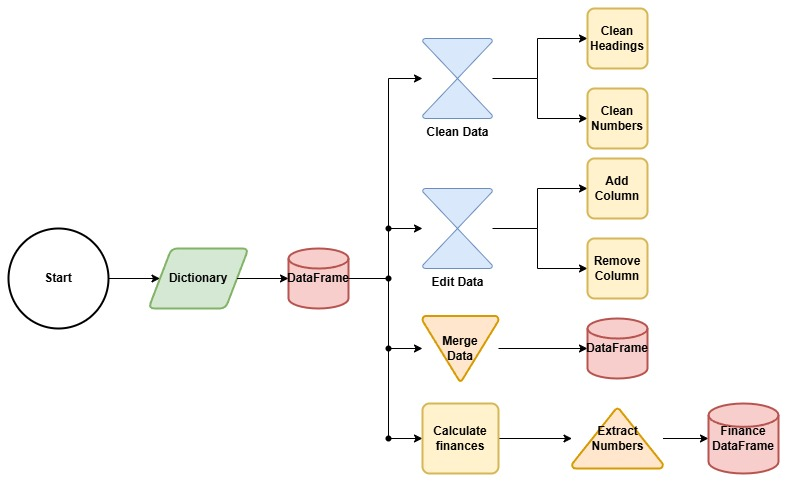

#### Code Explanation

The `DataFrameManager` class accepts an arbitrary number of dictionaries in an acceptable structure to create a DataFrame. It was structured as a class from the outset, so each method is independent of the others, as is represented in the flow chart. The user must call the relevant dataframes to display output as all the functionality is internal. Once it is initialised, it will take each dictionary given to it, create a DataFrame and then store that as its own attribute. A few methods use error handling to either check that the correct key is present, that we are not duplicating databases, or that we are using the correct type. After testing, I have added these to ensure that running the same function multiple times will not generate errors.
The methods are ordered in the class in the same order the questions have been asked.

- The `DataFrameManager` class requires dictionaries to initialise, storing them as dataframes in tis attributes. Has error handling for incorrect values supplied.
- The `clean_headings` method removes the trailing 's'.
- The `_attribute_name_check` ensure that an attribute name is not being reused. This prevents double joinging of the frames in the merge function.
- The `join_dataframes` method matches the headings and then merges the frames. It checks to ensure the headings can be merged and throws an error if it is not possible.
- The `clean_number` method examines the table for string values in number columns, it then zeroes those values, calculates the mean and replaces the zeroes with the mean. The zeroes were deliberately included in the calculation of the mean to maintain accuracy based on the number of columns.
- The `delete_col` method drops a column from the table. It has a check to ensure the column exists, and if not, shows an error message. `inplace=True` is utilised for simplicity but altering the data like this is typically bad practice. In the case of the data set as dictionaries, it is not an issue as the original data is readily available.
- The `add_col` method creates the department column and adds values based on the product. An alternative way would be to create a dictionary of each department with lists of the products. This would be more practical on a larger scale with changing products, however, the method seen here makes sense for this dataset, as we already have the products placed in a Dataframe.
- The `create_finance_frame` method takes the current dataframe and calculates finances from it, outputting anew dataframe.
- The `calculate_total` method totals all the columns of the finance dataframe and adds a row with the info..
- The `evaluation_message` reads the overall total and displays a message based on the result.


In [ ]:
class DataFrameManager:
    """Create dataframes from dictionaries and provide manage options."""

    # a. Convert each database into a dataframe in python.
    def __init__(self, *args: dict[str, list]) -> None:
        """Accept dictionaries and store as attributes."""
        try:
            # Accept a dictionary, loop through each.
            for i, db_dict in enumerate(args):
                # Create a dataframe, store it as an attribute.
                data_frame = DataFrame(db_dict)
                setattr(self, f'dict_df_{i + 1}', data_frame)
        except ValueError as e:
            print(
                Fore.RED + 'Please ensure your data is a dict structured for '
                f'DataFrames: {e}' + Style.RESET_ALL,
            )

    # b. Note that the databases and the corresponding column names with
    # spelling differences. Correct this to have all column names without 's'
    def clean_headings(self) -> None:
        """Remove the final s from the dataframe column names."""
        # Loop through each frame, create columns without the s.
        for value in vars(self).values():
            new_columns = [col.removesuffix('s') for col in value.columns]
            # Set the new list as the columns.
            value.columns = new_columns

    # c. Combine the above three databases into one single dataframe called
    # 'dbase4' in python using the appropriate method and libraries.

    def _attribute_name_check(self, attr_name: str) -> None:
        """Check that a database name is not already in use."""
        for key in vars(self):
            # Check if attribute name exists to prevent incorrect merging.
            if attr_name == key:
                message = 'That name is already in use. Please choose another.'
                raise ValueError(message)

    def join_dataframes(self, attr_name: str) -> DataFrame:
        """Merge dataframes into a single table based on columns.

        Args:
            attr_name (str): The name for the new attribute.

        Returns:
            DataFrame: Single dataframe.

        """
        # Use error handling in case columns can't merge this way.
        try:
            self._attribute_name_check(attr_name)
            # Get a list of the frames set as attributes for merging.
            frame_list = list(vars(self).values())

            # Set default frame for merge.
            merged_df = frame_list[0]

            # Merge frames after the first
            for df in frame_list[1:]:
                # Check for matching columns between frames.
                matching_cols = [
                    col for col in df.columns if col in merged_df.columns
                ]
                # Merge the tables based on those columns.
                merged_df = merged_df.merge(df, on=matching_cols, how='outer')
        # Throw an error with a message of they don't match.
        except ValueError as e:
            print(
                Fore.RED + 'There is an issue with the dataset merging.'
                f' Please check they have shared columns: {e}'
                + Style.RESET_ALL,
            )
        else:
            # Set the new frame as an attribute and return for assignment.
            setattr(self, attr_name, merged_df)
            return merged_df

    # d. Consider the character values as error, remove these errors and
    # replace with column's mean.
    def clean_number(self, frame: DataFrame, num_cols: list[str]) -> None:
        """Check for strings in number column, replace with mean.

        Args:
            frame (DataFrame): The data frame to clean.
            num_cols (list[str]): The names of the columns to clean.

        """
        # Loop through number columns and check their type.
        for col in num_cols:
            # If it isn't a number type, set it to zero.
            num_vals = [
                val if isinstance(val, (int, float)) else 0
                for val in frame[col]
            ]

            # Get the mean of a column including zeros.
            mean = sum(num_vals) / len(num_vals)
            # If the value has a zero, replace it with the mean.
            for i in range(len(num_vals)):
                if num_vals[i] == 0:
                    num_vals[i] = round(mean)
            # Set new values to frame.
            frame[col] = num_vals

    # e. Delete the variable 'Debit' as not needed then add a column called
    # 'Department'
    def delete_col(self, frame: DataFrame, col: str) -> DataFrame:
        """Delete a column from a frame.

        Args:
            frame (DataFrame): The frame to alter.
            col (str): The column to delete.

        Returns:
            _type_: The altered data frame.

        """
        # Delete a column, keep the same frame.
        # Usually, inplace=True should not be used, but
        # the dataset is minor in this case.
        try:
            frame.drop(col, axis=1, inplace=True)
        except KeyError as e:
            print(
                Fore.RED
                + f'Please ensure the dataframe has the correct columns: {e}'
                + Style.RESET_ALL,
            )

    def add_col(self, frame: DataFrame, col: str) -> DataFrame:
        """Add a column and generate values for it.

        Args:
            frame (DataFrame): the data frame to alter.
            col (str): the column name to add.

        Returns:
            DataFrame: The altered frame.

        """
        # Map products to departments to add it easily later.
        product_category = {
            'Telephone': 'IT',
            'Monitors': 'IT',
            'Car': 'Transport',
            'Rent': 'Consultancy',
            'Services': 'Consultancy',
            'Training': 'Education',
        }

        # Create a list to add to the data frame.
        to_add = [
            product_category.get(value, '') for value in frame['Product']
        ]

        # Add to DataFrame.
        frame[col] = to_add
        return frame

    # g. After creating the single dataframe: Using DataFrame and Class or
    # other method with the above corrected values
    def create_finance_frame(self, frame: DataFrame) -> DataFrame:
        """Create a new DataFrame with financial statistics.

        Args:
            frame (DataFrame): The dataframe containing the information.

        Returns:
            DataFrame: New dataframe with financial details.

        """
        try:
            # Define a dictionary to use as a frame later
            finance_frame = {
                'TR_ID': frame['TR_ID'],
                'Product': frame['Product'],
            }

            # Initalise lists to add to frame later.
            revenue = []
            cost = []
            profit = []

            # Calculate revenue from products and add it to the list.
            for _index, row in frame.iterrows():
                product_revenue = row['Quantity'] * row['Sale_price']
                if product_revenue > 55000:
                    product_revenue *= 0.95
                elif 35000 < product_revenue <= 55000:
                    product_revenue *= 0.98
                else:
                    product_revenue *= 0.99
                revenue.append(product_revenue)
                # Calculate cost and add it to the list.
                product_cost = row['Quantity'] * row['Purchase_price']
                cost.append(product_cost)

                # Add profit to the list.
                profit.append(product_revenue - product_cost)

            # Add each list to the dictionary and return info as a frame.
            finance_frame['Revenue'] = revenue
            finance_frame['Cost'] = cost
            finance_frame['Profit'] = profit
        except KeyError as e:
            print(
                Fore.RED
                + f'Please ensure the dataframe has the correct columns: {e}'
                + Style.RESET_ALL,
            )
        else:
            return DataFrame(finance_frame)

    def calculate_total(self, frame: DataFrame) -> None:
        """Calculate the total sales, cost and profit of products.

        Args:
            frame (DataFrame): The frame to use for calculations.

        Returns:
            _type_: A merged frame of the old with the total columns.

        """
        # Select all number columns, sum their totals and create a frame.
        totals_frame = (
            frame.select_dtypes(include=['number']).sum().to_frame().T
        )

        # Add columns to the newly created frame.
        totals_frame.insert(0, 'TR_ID', 'Total')
        totals_frame.insert(1, 'Product', '-----')

        # Return a new frame, adding the totals row to the financial frame.
        return concat([frame, totals_frame], ignore_index=True)

    def evaluation_message(self, number: int) -> None:
        """Respond with a message based on value.

        Args:
            number (int): the number to evaluate.

        """
        # Green, Red, or Yellow terminal messages based on the value given.
        if number > 0:
            print(
                Fore.GREEN
                + "The business is on it's way to success!"
                + Style.RESET_ALL,
            )
        if number == 0:
            print(
                Fore.YELLOW
                + 'Just breaking even. Hang in there!'
                + Style.RESET_ALL,
            )
        if number < 0:
            print(Fore.RED + 'Time to revise your finances.' + Style.RESET_ALL)

In [343]:
# Declare data.
dbase1_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Product': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Quantitys': [
        420,
        'Ten',
        234,
        114,
        56,
        13,
    ],
    'Purchase_prices': [
        223,
        344,
        223,
        'Tenn',
        'Two',
        223,
    ],
}
dbase2_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Products': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Sale_price': [
        300,
        435,
        329,
        544,
        'thirty',
        329,
    ],
    'Debit': [
        2,
        2,
        2,
        2,
        2,
        2,
    ],
}

dbase3_dict = {
    'TR_ID': ['C28'],
    'Product': ['Training'],
    'Quantity': [13],
    'Purchase_price': [223],
    'Sale_price': [329],
}

### a. Convert each database into a dataframe in python.


In [344]:
# Accepts dictionaries and stores the data frames as attributes.
product_frame = DataFrameManager(dbase1_dict, dbase2_dict, dbase3_dict)

# First DataFrame.
product_frame.dict_df_1

,TR_ID,Product,Quantitys,Purchase_prices
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


In [345]:
# Second Dataframe
product_frame.dict_df_2

,TR_ID,Products,Sale_price,Debit
0,C23,Telephone,300,2
1,C24,Monitors,435,2
2,C25,Car,329,2
3,C26,Rent,544,2
4,C27,Services,thirty,2
5,C28,Training,329,2


In [346]:
# Third dataframe
product_frame.dict_df_3

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C28,Training,13,223,329


### b. Note that the databases and the corresponding column names with spelling differences. Correct this to have all column names without ‘s’


In [ ]:
# Remove the trailing 's'.
# It has cleaned all heading, but one is shown here as an example.
product_frame.clean_headings()
product_frame.dict_df_1

,TR_ID,Product,Quantity,Purchase_price
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


### c. Combine the above three databases into one single dataframe called ‘dbase4’ in python using the appropriate method and libraries.


In [ ]:
# Choose a name, merge the databases, and create a new one.
product_frame.join_dataframes('dbase4')
product_frame.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,Ten,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,Tenn,544,2
4,C27,Services,56,Two,thirty,2
5,C28,Training,13,223,329,2


### d. Consider the character values as error, remove these errors and replace with column’s mean.


In [349]:
# Clean the numbers and replace them with the mean.
product_frame.clean_number(
    product_frame.dbase4,
    ['Quantity', 'Purchase_price', 'Sale_price'],
)
product_frame.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,140,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,169,544,2
4,C27,Services,56,169,323,2
5,C28,Training,13,223,329,2


### e. Delete the variable ‘Debit’ as not needed then add a column called‘Department’ and assign values from product column: Telphone, monitor -> IT, Car -> transport Rent, Services-> Consultancy Training -> Education


In [350]:
# Drop the Debit column.
product_frame.delete_col(product_frame.dbase4, 'Debit')
product_frame.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C23,Telephone,420,223,300
1,C24,Monitors,140,344,435
2,C25,Car,234,223,329
3,C26,Rent,114,169,544
4,C27,Services,56,169,323
5,C28,Training,13,223,329


In [ ]:
# Add the Department column.
product_frame.add_col(product_frame.dbase4, 'Department')
product_frame.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Department
0,C23,Telephone,420,223,300,IT
1,C24,Monitors,140,344,435,IT
2,C25,Car,234,223,329,Transport
3,C26,Rent,114,169,544,Consultancy
4,C27,Services,56,169,323,Consultancy
5,C28,Training,13,223,329,Education


### f. Visualise the data by creating the plot: product by sale and purchase prices on the same plot.


<Axes: xlabel='Purchase_price', ylabel='Sale_price'>

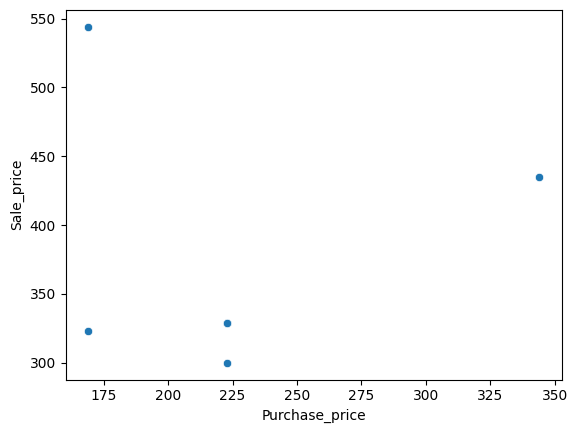

In [ ]:
# Use seaborn to create a simple scatterplot.
# I chose not to include this in the class as it does not handle the dataframe.
sns.scatterplot(data=product_frame.dbase4, x='Purchase_price', y='Sale_price')

### g. After creating the single dataframe: Using DataFrame and Class or other method with the above corrected values: Calculate:

Revenue = Quantity*Sale_price  
Cost= quantity*purchase_price  
Note if revenue > $55000 then a cashback of 5% is given so revenue is less by the 5% amount  
If revenue > $35000 and <= $550000 then cashback of %2 is given and revenue less the 2% amount But If revenue <=35000 then cashback of 1% amount is given  
The calculated total cost and total revenue Profit = total revenue – total cost.  
Report the TR_ID, product name, total revenue, total cost and profit.  
Check if final profit > 0 then print a message.  
If final profit = 0 then print a message.  
If final profit < 0 then print a message


In [353]:
# Create a new DataFrame with financial info.
dbase4_finances = product_frame.create_finance_frame(product_frame.dbase4)
# Format everything to two decimal places
dbase4_finances.style.format({'Revenue': '{:.2f}', 'Profit': '{:.2f}'})

,TR_ID,Product,Revenue,Cost,Profit
0,C23,Telephone,119700.00,93660,26040.00
1,C24,Monitors,57855.00,48160,9695.00
2,C25,Car,73136.70,52182,20954.70
3,C26,Rent,58915.20,19266,39649.20
4,C27,Services,17907.12,9464,8443.12
5,C28,Training,4234.23,2899,1335.23


In [ ]:
# Calculate the totals for each column.
totals_dict = product_frame.calculate_total(dbase4_finances)
# Format the numbers to two decimal places and give the columns colors.
totals_dict.style.format(
    {'Revenue': '{:.2f}', 'Cost': '{:.2f}', 'Profit': '{:.2f}'},
).apply(
    color_last_cell,
    subset=['Revenue', 'Profit'],
    color='green',
).apply(color_last_cell, subset=['Cost'], color='red').apply(
    color_last_cell,
    subset=['TR_ID'],
    color='orange',
)

,TR_ID,Product,Revenue,Cost,Profit
0,C23,Telephone,119700.00,93660.00,26040.00
1,C24,Monitors,57855.00,48160.00,9695.00
2,C25,Car,73136.70,52182.00,20954.70
3,C26,Rent,58915.20,19266.00,39649.20
4,C27,Services,17907.12,9464.00,8443.12
5,C28,Training,4234.23,2899.00,1335.23
6,Total,-----,331748.25,225631.00,106117.25


In [355]:
# Display success message based on the final cell.
product_frame.evaluation_message(totals_dict['Profit'].iloc[-1])

The business is on it's way to success!


## Question 2. Stock Transaction Program


Tom purchased some stock in DBS Software.

Here are the details:

1. The number of shares that Tom purchased was 5,000
2. When Tom purchased the stock, he paid €40.0 per share.
3. Tom paid his stockbroker a commission that amounted to 3% of the amount he paid for the stock.

Two weeks later, Tom sold the stock. Here are the details:

1. The number of shares that Tom sold was 2,000
2. When Tom sold the stock , he sold for €42.75 per share.
3. Tom paid his stockbroker another commission that amounted to 3% of the amount he received for the stock.

Write a program that displays the following information.

1. The amount of money Tom paid for the stock
2. The amount of commission Tom paid his broker when he bought the stock.
3. The amount for which Tom sold the stock
4. The amount of commission Tom paid his broker when he sold the stock.
5. Display the amount of money that Tom had left when he sold the stock and paid his broker(both times). If this amount is positive, then Tom made a profit. If the amount is negative, then Tom lost money.


### StockCalculator


#### Flowchart

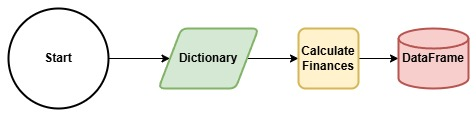
#### Code Explanation

The `StockCalculator` class is a straightforward class that requires minimal input from the end user. It will accept a dictionary of values, do the calculations required, and store the results in an easily usable DataFrame. The user must then call the dataframe for output. The table provides coloured feedback to highlight the results. The minimal amoount of input is specifically to aid in defensive design, so the user can't make mistakes. It has error handling that responds with a message if the dictionary contains non-number values. I considered allowing input, but as the question specifies certain numbers I chose a dictionary instead. Editing the dictionary with diffierent values is easy to test for other stock purchases. All methods except the `calculate_into_frame` method are simply one-line calculations that are callable, as such I won't explain them in detail. I designed the code this way to make it cleaner and easier to read. Previously, I had accessed the values with dictionaries in a single function but it was very unclear.

- The `StockCalculator` class requires a dictionaries to initialise, storing the keys and values as attributes.
- The `calculate_into_frame` method uses the other methods to calculate and store the values from the stock trade, storing them in a dicitionary. Once they have all been stored correctly, it returns a dataframe to be displayed. It has error handling to catch and non-number values, and displays an error message.


In [ ]:
class StockCalculator:
    """Accept dictionary for stack trade values and calculate statistics."""

    def __init__(self, stock: dict[str, int | float]) -> None:
        """Accept dictionary with the defined keys and sets them as attributes.

        'buy_shares': number of shares bought,
        'sell_shares': number of shares sold,
        'buy_price': cost per share purchased,
        'sell_price': price per share sold,
        'commission_percent': commission as a percentage, eg. 3,
        """
        # Set each key and value in the dictionary as an attribute.
        for key, value in stock.items():
            setattr(self, key, value)

    def calculate_purchase_cost(self) -> float:
        """Calculate total cost of purchasing shares.

        Returns:
            float: Total cost of purchase.

        """
        return self.buy_shares * self.buy_price

    def calculate_commission(self, cost: float) -> float:
        """Calculate cost of commission for purchase.

        Args:
            cost (float): Total purchase cost.

        Returns:
            float: Cost of commission.

        """
        return cost * self.commission_percent / 100

    def calculate_sale_total(self) -> float:
        """Calculate total income of sale.

        Returns:
            float: Income of sale.

        """
        return self.sell_shares * self.sell_price

    def calculate_into_frame(self) -> DataFrame:
        """Calculate final details and create a DataFrame.

        Returns:
            DataFrame: A small summary table of results.

        """
        try:
            # Use previously defined functions to do calculations.
            purchase_cost = self.calculate_purchase_cost()
            purchase_commission = self.calculate_commission(purchase_cost)
            sale_total = self.calculate_sale_total()
            sale_commission = self.calculate_commission(sale_total)

            total_money = sale_total - purchase_commission - sale_commission
            net_profit = total_money - purchase_cost

            # Take the statistics and store as a dictionary.
            stat_dict = {
                'Purchase Cost': [purchase_cost],
                'Purchase Commission': [purchase_commission],
                'Sale Total': [sale_total],
                'Sale Commission': [sale_commission],
                'Net Sales': [total_money],
                'Net Profit': [net_profit],
            }
        # Throw an error if a value is not a number.
        except TypeError as e:
            print(
                Fore.RED + 'Please ensure all your values are numbers,'
                f' either ints or floats: {e}' + Style.RESET_ALL,
            )
        else:
            # Return a dataframe.
            return DataFrame(stat_dict)

In [357]:
# Define dictionary to initalise the class with.
toms_trade = {
    'buy_shares': 5000,
    'sell_shares': 2000,
    'buy_price': 40.0,
    'sell_price': 42.75,
    'commission_percent': 3,
}

# Initialise the class.
toms_calculator = StockCalculator(toms_trade)


In [ ]:
# Calculate the statistics based on the info.
stat_frame = toms_calculator.calculate_into_frame()

# Display with colours, and two decimal point formatting.
stat_frame.style.apply(
    color_last_cell,
    subset=['Sale Total', 'Net Sales'],
    color='green',
).apply(
    color_last_cell,
    subset=['Purchase Cost', 'Purchase Commission', 'Sale Commission'],
    color='red',
).apply(
    color_on_value,
    subset=['Net Profit'],
    number=stat_frame['Net Profit'].iloc[-1],
).format(dict.fromkeys(stat_frame.columns, '{:.2f}'))


,Purchase Cost,Purchase Commission,Sale Total,Sale Commission,Net Sales,Net Profit
0,200000.00,6000.00,85500.00,2565.00,76935.00,-123065.00
